In [ ]:
# Setup

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

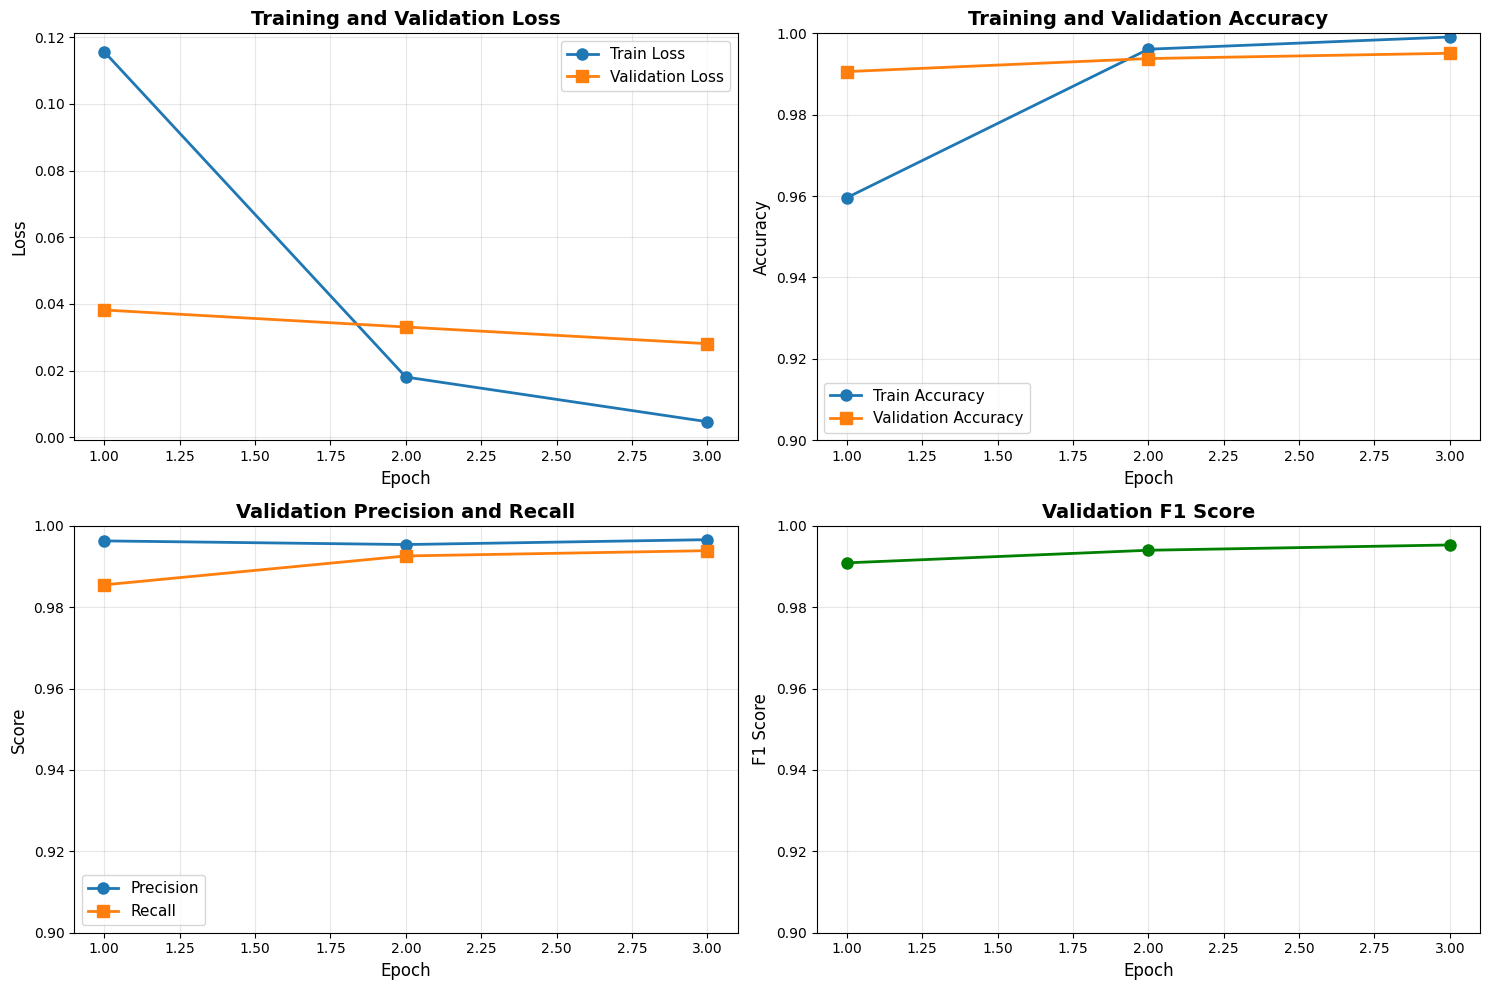

In [21]:
# Training history

training_history = {
    'epochs': [1, 2, 3],
    'train_loss': [0.1156, 0.0181, 0.0047],
    'val_loss': [0.0382, 0.0331, 0.0281],
    'train_acc': [0.9596, 0.9961, 0.9991],
    'val_acc': [0.9906, 0.9938, 0.9951],
    'val_precision': [0.9963, 0.9954, 0.9966],
    'val_recall': [0.9855, 0.9926, 0.9939],
    'val_f1': [0.9909, 0.9940, 0.9953]
}

def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    axes[0, 0].plot(history['epochs'], history['train_loss'], 'o-', label='Train Loss', linewidth=2, markersize=8)
    axes[0, 0].plot(history['epochs'], history['val_loss'], 's-', label='Validation Loss', linewidth=2, markersize=8)
    axes[0, 0].set_xlabel('Epoch', fontsize=12)
    axes[0, 0].set_ylabel('Loss', fontsize=12)
    axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0, 0].legend(fontsize=11)
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(history['epochs'], history['train_acc'], 'o-', label='Train Accuracy', linewidth=2, markersize=8)
    axes[0, 1].plot(history['epochs'], history['val_acc'], 's-', label='Validation Accuracy', linewidth=2, markersize=8)
    axes[0, 1].set_xlabel('Epoch', fontsize=12)
    axes[0, 1].set_ylabel('Accuracy', fontsize=12)
    axes[0, 1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axes[0, 1].legend(fontsize=11)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim([0.9, 1.0])

    axes[1, 0].plot(history['epochs'], history['val_precision'], 'o-', label='Precision', linewidth=2, markersize=8)
    axes[1, 0].plot(history['epochs'], history['val_recall'], 's-', label='Recall', linewidth=2, markersize=8)
    axes[1, 0].set_xlabel('Epoch', fontsize=12)
    axes[1, 0].set_ylabel('Score', fontsize=12)
    axes[1, 0].set_title('Validation Precision and Recall', fontsize=14, fontweight='bold')
    axes[1, 0].legend(fontsize=11)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim([0.9, 1.0])

    axes[1, 1].plot(history['epochs'], history['val_f1'], 'o-', color='green', linewidth=2, markersize=8)
    axes[1, 1].set_xlabel('Epoch', fontsize=12)
    axes[1, 1].set_ylabel('F1 Score', fontsize=12)
    axes[1, 1].set_title('Validation F1 Score', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_ylim([0.9, 1.0])
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_training_history(training_history)

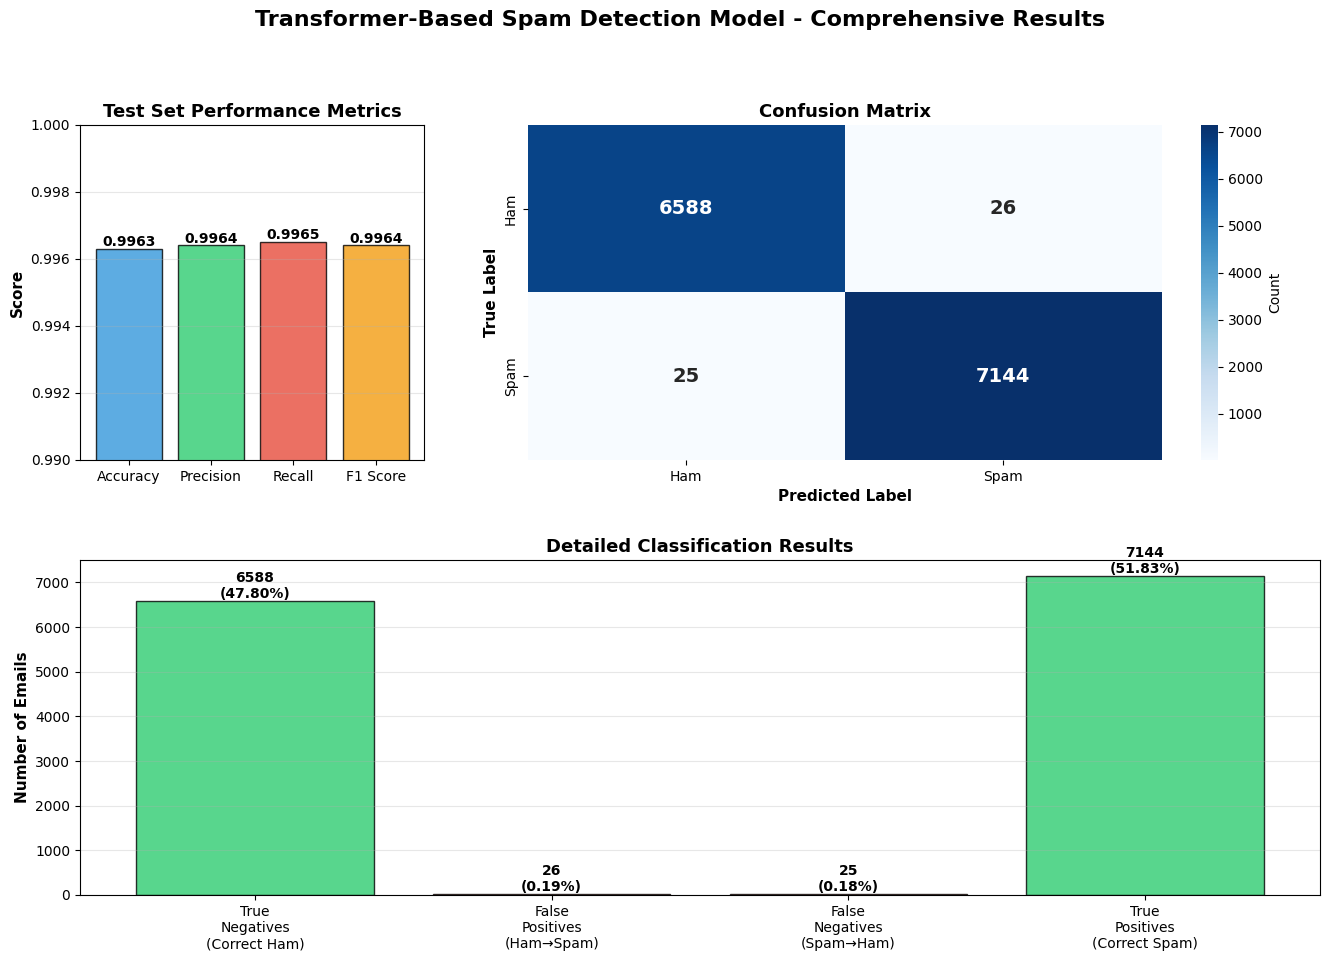

In [22]:
# Overview

test_metrics = {
    'accuracy': 0.9963,
    'precision': 0.9964,
    'recall': 0.9965,
    'f1': 0.9964
}

test_cm = np.array([[6588, 26], 
                     [25, 7144]])

def plot_comprehensive_results(test_metrics, cm):

    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[0, 0])
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [test_metrics['accuracy'], test_metrics['precision'], 
              test_metrics['recall'], test_metrics['f1']]
    colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
    bars = ax1.bar(metrics, values, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_ylabel('Score', fontsize=11, fontweight='bold')
    ax1.set_title('Test Set Performance Metrics', fontsize=13, fontweight='bold')
    ax1.set_ylim([0.99, 1.0])
    ax1.grid(True, alpha=0.3, axis='y')
    for bar, val in zip(bars, values):
        ax1.text(bar.get_x() + bar.get_width()/2, val, f'{val:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax2 = fig.add_subplot(gs[0, 1:])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
                cbar_kws={'label': 'Count'}, annot_kws={'size': 14, 'weight': 'bold'},
                ax=ax2)
    ax2.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    ax2.set_ylabel('True Label', fontsize=11, fontweight='bold')
    ax2.set_title('Confusion Matrix', fontsize=13, fontweight='bold')
    
    ax3 = fig.add_subplot(gs[1, :])
    categories = ['True\nNegatives\n(Correct Ham)', 
                  'False\nPositives\n(Ham→Spam)', 
                  'False\nNegatives\n(Spam→Ham)', 
                  'True\nPositives\n(Correct Spam)']
    counts = [cm[0,0], cm[0,1], cm[1,0], cm[1,1]]
    colors_error = ['#2ecc71', '#e74c3c', '#e74c3c', '#2ecc71']
    bars = ax3.bar(categories, counts, color=colors_error, alpha=0.8, edgecolor='black')
    ax3.set_ylabel('Number of Emails', fontsize=11, fontweight='bold')
    ax3.set_title('Detailed Classification Results', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='y')

    total = sum(counts)
    for bar, count in zip(bars, counts):
        percentage = (count / total) * 100
        ax3.text(bar.get_x() + bar.get_width()/2, count,
                f'{count}\n({percentage:.2f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.suptitle('Transformer-Based Spam Detection Model - Comprehensive Results', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    plt.savefig('comprehensive_results.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_comprehensive_results(test_metrics, test_cm)

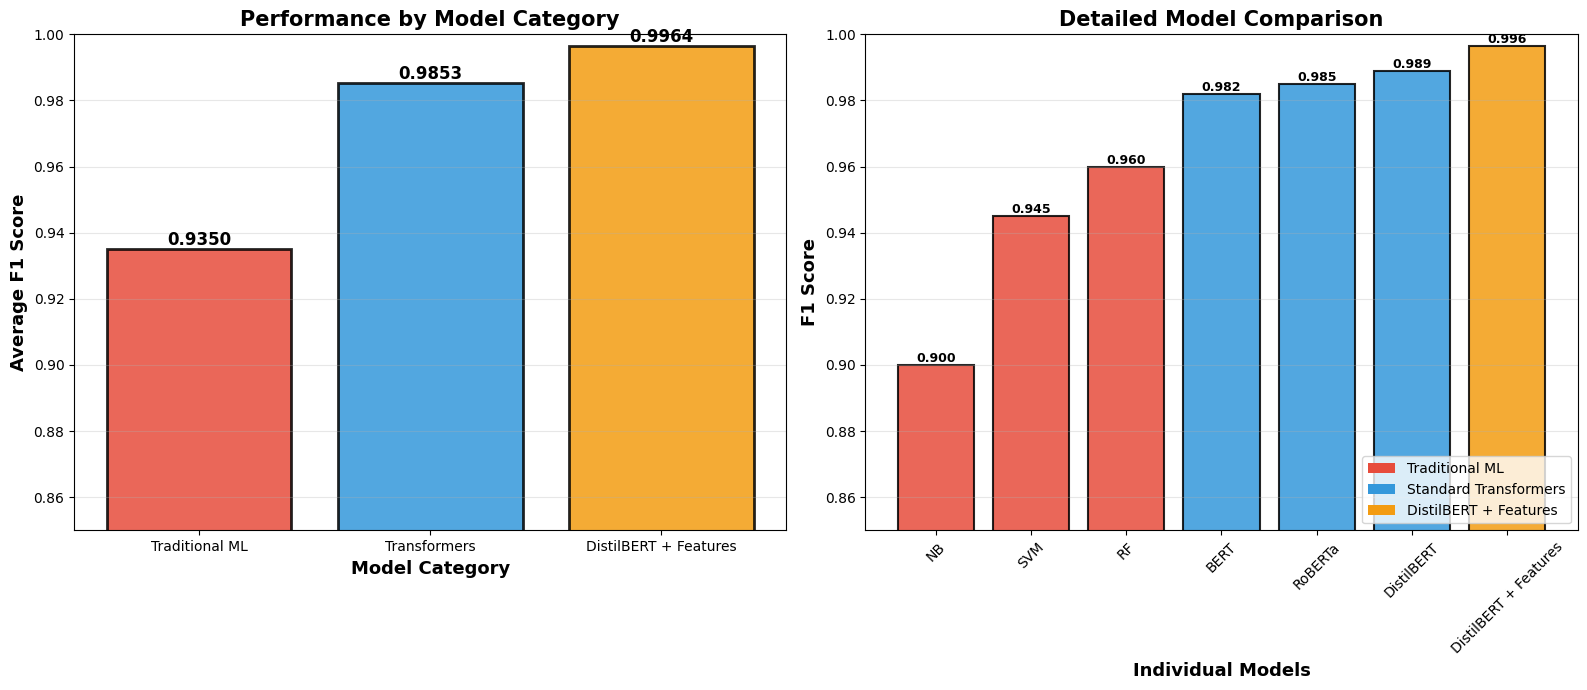

In [23]:
# Compare traditional ML, standard transformers, and your enhanced model

def plot_comprehensive_model_comparison():

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    categories = ['Traditional ML', 'Transformers', 'DistilBERT + Features']
    models_per_cat = [
        ['Naive Bayes', 'SVM', 'Random Forest'],
        ['BERT', 'RoBERTa', 'DistilBERT'],
        ['DistilBERT\n+ Features']
    ]
    f1_per_cat = [
        [0.90, 0.945, 0.96],
        [0.982, 0.985, 0.989],
        [0.9964]
    ]
    colors_cat = ['#e74c3c', '#3498db', '#f39c12']

    avg_f1 = [np.mean(scores) for scores in f1_per_cat]
    
    bars = ax1.bar(categories, avg_f1, color=colors_cat, alpha=0.85, edgecolor='black', linewidth=2)
    ax1.set_ylabel('Average F1 Score', fontsize=13, fontweight='bold')
    ax1.set_xlabel('Model Category', fontsize=13, fontweight='bold')
    ax1.set_title('Performance by Model Category', fontsize=15, fontweight='bold')
    ax1.set_ylim([0.85, 1.0])
    ax1.grid(True, alpha=0.3, axis='y')
    
    for bar, score in zip(bars, avg_f1):
        ax1.text(bar.get_x() + bar.get_width()/2., score,
                f'{score:.4f}', ha='center', va='bottom', 
                fontsize=12, fontweight='bold')

    all_models = ['NB', 'SVM', 'RF', 'BERT', 'RoBERTa', 'DistilBERT', 'DistilBERT + Features']
    all_scores = [0.90, 0.945, 0.96, 0.982, 0.985, 0.989, 0.9964]
    all_colors = ['#e74c3c']*3 + ['#3498db']*3 + ['#f39c12']
    
    bars2 = ax2.bar(all_models, all_scores, color=all_colors, alpha=0.85, edgecolor='black', linewidth=1.5)
    ax2.set_ylabel('F1 Score', fontsize=13, fontweight='bold')
    ax2.set_xlabel('Individual Models', fontsize=13, fontweight='bold')
    ax2.set_title('Detailed Model Comparison', fontsize=15, fontweight='bold')
    ax2.set_ylim([0.85, 1.0])
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.tick_params(axis='x', rotation=45)
    
    for bar, score in zip(bars2, all_scores):
        ax2.text(bar.get_x() + bar.get_width()/2., score,
                f'{score:.3f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', rotation=0)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e74c3c', label='Traditional ML'),
        Patch(facecolor='#3498db', label='Standard Transformers'),
        Patch(facecolor='#f39c12', label='DistilBERT + Features')
    ]
    ax2.legend(handles=legend_elements, loc='lower right', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_comprehensive_model_comparison()
